BOT-IOT DATASET (Rajan, Rippendeep, Sanyamdeep, Ritika, Shreya)            
Description:                                           
https://ieee-dataport.org/documents/bot-iot-dataset                     
Dataset:                          
https://cloudstor.aarnet.edu.au/plus/s/umT99TnxvbpkkoE?path=%2FCSV%2FTraning%20and%20Testing%20Tets%20(5%25%20of%20the%20entier%20dataset)%2F10-best%20features%2F10-best%20Training-Testing%20split

In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/file/d/1uV8qsVnl1XLxLlfw2tnGF3rbIU3tntHI/view?usp=sharing'
linkId = '1uV8qsVnl1XLxLlfw2tnGF3rbIU3tntHI'

#fluff
print (linkId)

1uV8qsVnl1XLxLlfw2tnGF3rbIU3tntHI


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
downloaded = drive.CreateFile({'id':linkId}) 
downloaded.GetContentFile('Bot_IOT.csv')  
df = pd.read_csv('Bot_IOT.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(df)

         pkSeqID proto            saddr  ... attack category subcategory
0        3142762   udp  192.168.100.150  ...      1     DDoS         UDP
1        2432264   tcp  192.168.100.150  ...      1     DDoS         TCP
2        1976315   tcp  192.168.100.147  ...      1     DDoS         TCP
3        1240757   udp  192.168.100.150  ...      1      DoS         UDP
4        3257991   udp  192.168.100.147  ...      1     DDoS         UDP
...          ...   ...              ...  ...    ...      ...         ...
2934812  1132803   udp  192.168.100.149  ...      1      DoS         UDP
2934813  3384621   udp  192.168.100.150  ...      1     DDoS         UDP
2934814   775893   udp  192.168.100.149  ...      1      DoS         UDP
2934815   443484   tcp  192.168.100.147  ...      1      DoS         TCP
2934816    96906   tcp  192.168.100.150  ...      1      DoS         TCP

[2934817 rows x 19 columns]


In [ ]:
#Data preprocessing
#checking for NULL Values
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

In [ ]:
df.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,3142762,udp,192.168.100.150,6551,192.168.100.3,80,251984,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,1,DDoS,UDP
1,2432264,tcp,192.168.100.150,5532,192.168.100.3,80,256724,0.078003,38,3.856930,3,3.934927,100,0.0,0.256493,4.012924,1,DDoS,TCP
2,1976315,tcp,192.168.100.147,27165,192.168.100.3,80,62921,0.268666,100,2.974100,3,3.341429,100,0.0,0.294880,3.609205,1,DDoS,TCP
3,1240757,udp,192.168.100.150,48719,192.168.100.3,80,99168,1.823185,63,0.000000,4,3.222832,63,0.0,0.461435,4.942302,1,DoS,UDP
4,3257991,udp,192.168.100.147,22461,192.168.100.3,80,105063,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,1,DDoS,UDP


In [ ]:
df=df.drop(['pkSeqID', 'saddr', 'sport', 'daddr', 'dport', 'proto'], axis = 1)

In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#dependent and independent variables
X = df.iloc[:, 0:10]
Y = df.loc[:, 'attack']

In [ ]:
#training and testing data
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size = 0.3)

In [ ]:
scores_gini = []
print('Accuracy score for values of max_depth of a decision tree are :')
print('Max Depth     Accuracy Score')
for i in range(1,9):
  dtree_test_gini = DecisionTreeClassifier(criterion='gini',max_depth=i)
  dtree_test_gini.fit(X_train,Y_train)
  scores_gini.append(dtree_test_gini.score(X_val,Y_val))
  print(i,'          ', scores_gini[i-1])

print('We got maximum accuracy for max_depth=', scores_gini.index(max(scores_gini))+1, 'and the maximum accuracy is: ', max(scores_gini))

Accuracy score for values of max_depth of a decision tree are :
Max Depth     Accuracy Score
1            0.9998716559561859
2            0.9998943717161529
3            0.9999114085361283
4            0.9999102727481299
5            0.9999068653841349
6            0.9999239022041102
7            0.9999284453561036
8            0.9999329885080971
We got maximum accuracy for max_depth= 8 and the maximum accuracy is:  0.9999329885080971


In [ ]:
#making classifier
clf = DecisionTreeClassifier(criterion='gini' , max_depth=8)

In [ ]:
#Training the classifier
clf.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#calcuating accuracy of the model on validation set
Predt = clf.predict(X_val)

#calculate accuracy
print (accuracy_score(Y_val, Predt)*100 )

99.99341242960953


[Text(160.54955357142856, 205.35999999999999, 'X[6] <= 2.5\ngini = 0.0\nsamples = 2054371\nvalue = [257, 2054114]'),
 Text(85.69285714285715, 181.2, 'X[2] <= 5.5\ngini = 0.313\nsamples = 495\nvalue = [96, 399]'),
 Text(51.81428571428572, 157.04, 'X[0] <= 17115.5\ngini = 0.077\nsamples = 397\nvalue = [16, 381]'),
 Text(31.885714285714286, 132.88, 'X[3] <= 0.0\ngini = 0.302\nsamples = 81\nvalue = [15, 66]'),
 Text(15.942857142857143, 108.72, 'X[4] <= 3.5\ngini = 0.08\nsamples = 48\nvalue = [2, 46]'),
 Text(7.9714285714285715, 84.56, 'gini = 0.0\nsamples = 38\nvalue = [0, 38]'),
 Text(23.914285714285715, 84.56, 'X[2] <= 1.5\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(15.942857142857143, 60.400000000000006, 'X[8] <= 0.125\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(7.9714285714285715, 36.24000000000001, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(23.914285714285715, 36.24000000000001, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(31.885714285714286, 60.4000000000000

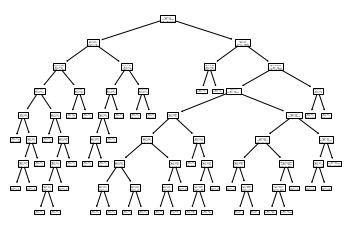

In [ ]:
#visualize the tree
tree.plot_tree(clf)

In [ ]:
####Uploading testing DATA
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


link = 'https://drive.google.com/file/d/1QIJWtK99SblVQK88AHqHwAVBZJcT14yW/view?usp=sharing'
linkId = '1QIJWtK99SblVQK88AHqHwAVBZJcT14yW'

downloaded = drive.CreateFile({'id':linkId}) 
downloaded.GetContentFile('Bot_IOT_Test.csv')  
dfTEST = pd.read_csv('Bot_IOT_Test.csv')

dfTEST

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,792371,udp,192.168.100.150,48516,192.168.100.3,80,175094,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438,1,DoS,UDP
1,2056418,tcp,192.168.100.148,22267,192.168.100.3,80,143024,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930,1,DDoS,TCP
2,2795650,udp,192.168.100.149,28629,192.168.100.3,80,167033,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455,1,DDoS,UDP
3,2118009,tcp,192.168.100.148,42142,192.168.100.3,80,204615,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700,1,DDoS,TCP
4,303688,tcp,192.168.100.149,1645,192.168.100.5,80,40058,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628,1,DoS,TCP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733700,1571905,udp,192.168.100.148,17412,192.168.100.6,80,168162,1.743940,39,0.000000,4,3.020449,39,0.000000,0.224603,4.043432,1,DoS,UDP
733701,2787099,udp,192.168.100.147,932,192.168.100.3,80,158482,0.694618,65,3.002272,4,3.905409,100,0.000000,0.875121,4.691634,1,DDoS,UDP
733702,2255382,tcp,192.168.100.149,47980,192.168.100.3,80,79841,1.744651,53,0.000000,1,2.464288,100,0.278496,0.472773,3.802142,1,DDoS,TCP
733703,588946,tcp,192.168.100.147,25096,192.168.100.7,80,63165,0.000000,100,0.000000,3,0.000000,100,0.000000,0.070461,0.000000,1,DoS,TCP


In [ ]:
dfTEST=dfTEST.drop(['pkSeqID', 'saddr', 'sport', 'daddr', 'dport', 'proto'], axis = 1)


In [ ]:
X_Test = dfTEST.iloc[: , 0:10]
Y_Test = dfTEST.loc[:,'attack']

In [ ]:
X_Test

,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max
0,175094,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438
1,143024,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930
2,167033,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455
3,204615,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700
4,40058,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628
...,...,...,...,...,...,...,...,...,...,...
733700,168162,1.743940,39,0.000000,4,3.020449,39,0.000000,0.224603,4.043432
733701,158482,0.694618,65,3.002272,4,3.905409,100,0.000000,0.875121,4.691634
733702,79841,1.744651,53,0.000000,1,2.464288,100,0.278496,0.472773,3.802142
733703,63165,0.000000,100,0.000000,3,0.000000,100,0.000000,0.070461,0.000000


In [ ]:
#calcuating accuracy of the model on test set
Predt1 = clf.predict(X_Test)

 
#calculate accuracy
print (accuracy_score(Y_Test, Predt1)*100 )
print("Classification Report")
print(classification_report(Y_Test, Predt1))
print("Confusion matrix")
print(confusion_matrix(Y_Test, Predt1))

99.99223121009125
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.51      0.66       107
           1       1.00      1.00      1.00    733598

    accuracy                           1.00    733705
   macro avg       0.96      0.76      0.83    733705
weighted avg       1.00      1.00      1.00    733705

Confusion matrix
[[    55     52]
 [     5 733593]]


In [ ]:
from array import array
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le1 = LabelEncoder()
df['category']=le.fit_transform(df['category'])
df['subcategory']=le1.fit_transform(df['subcategory'])

dfTEST['category']=le.transform(dfTEST['category'])
dfTEST['subcategory']=le1.transform(dfTEST['subcategory'])


In [ ]:
#dependent and independent variables
X_cat_train = df.iloc[:, 0:11]
Y_cat_train = df.loc[:, 'category']

X_cat_test =dfTEST.iloc[:, 0:10]
X_cat_test['attack']=Predt1
Y_cat_test=dfTEST.loc[:, 'category']

In [ ]:
#making classifier
clf1 = DecisionTreeClassifier(criterion='gini' , max_depth=8)
#Training the classifier
clf1.fit(X_cat_train, Y_cat_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(145.09670658682634, 205.35999999999999, 'X[6] <= 99.5\ngini = 0.521\nsamples = 2934817\nvalue = [1541315, 1320148, 370, 72919, 65]'),
 Text(73.1122005988024, 181.2, 'X[8] <= 0.034\ngini = 0.096\nsamples = 638261\nvalue = [6090, 606426, 370, 25310, 65]'),
 Text(27.064670658682637, 157.04, 'X[10] <= 0.5\ngini = 0.042\nsamples = 24966\nvalue = [195, 21, 267, 24439, 44]'),
 Text(25.05988023952096, 132.88, 'gini = 0.0\nsamples = 267\nvalue = [0, 0, 267, 0, 0]'),
 Text(29.069461077844313, 132.88, 'X[0] <= 46769.0\ngini = 0.021\nsamples = 24699\nvalue = [195, 21, 0, 24439, 44]'),
 Text(16.038323353293414, 108.72, 'X[0] <= 62.5\ngini = 0.004\nsamples = 24492\nvalue = [0, 9, 0, 24439, 44]'),
 Text(8.019161676646707, 84.56, 'X[2] <= 40.5\ngini = 0.427\nsamples = 136\nvalue = [0, 0, 0, 94, 42]'),
 Text(4.0095808383233535, 60.400000000000006, 'X[1] <= 0.0\ngini = 0.062\nsamples = 93\nvalue = [0, 0, 0, 90, 3]'),
 Text(2.0047904191616768, 36.24000000000001, 'gini = 0.0\nsamples = 87\nvalue = [

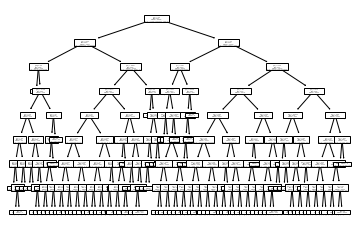

In [ ]:
#visualize the tree
tree.plot_tree(clf1)

In [ ]:
#calcuating accuracy of the model on testing set
Predt_cat = clf1.predict(X_cat_test)

#calculate accuracy
print (accuracy_score(Y_cat_test, Predt_cat)*100)

97.45279097184836


In [ ]:
#dependent and independent variables
X_subcat_train = df.iloc[:, 0:12]
Y_subcat_train = df.loc[:, 'subcategory']

X_subcat_test =dfTEST.iloc[:, 0:10]

X_subcat_test['attack']=Predt1
X_subcat_test['category']=Predt_cat
Y_subcat_test=dfTEST.loc[:, 'subcategory']

In [ ]:
#making classifier
clf2 = DecisionTreeClassifier(criterion='gini' , max_depth=8)
#Training the classifier
clf2.fit(X_subcat_train, Y_subcat_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#calcuating accuracy of the model on validation set
Predt_subcat = clf2.predict(X_subcat_test)

#calculate accuracy
print (accuracy_score(Y_subcat_test, Predt_subcat)*100)

99.74335734389162


[Text(211.04466240875914, 205.35999999999999, 'X[4] <= 3.5\ngini = 0.519\nsamples = 2934817\nvalue = [6, 1970, 59, 370, 14293, 58626, 1274843, 1584650]'),
 Text(131.6594890510949, 181.2, 'X[11] <= 1.5\ngini = 0.075\nsamples = 1323763\nvalue = [1, 1968, 48, 235, 13725, 34915, 1272844, 27]'),
 Text(70.564598540146, 157.04, 'X[7] <= 0.345\ngini = 0.003\nsamples = 1274839\nvalue = [0, 1968, 0, 0, 0, 0, 1272844, 27]'),
 Text(40.933576642335765, 132.88, 'X[0] <= 1110.5\ngini = 0.002\nsamples = 1273952\nvalue = [0, 1290, 0, 0, 0, 0, 1272639, 23]'),
 Text(19.55036496350365, 108.72, 'X[7] <= 0.166\ngini = 0.263\nsamples = 7256\nvalue = [0, 1129, 0, 0, 0, 0, 6127, 0]'),
 Text(9.775182481751825, 84.56, 'X[1] <= 1.986\ngini = 0.043\nsamples = 5999\nvalue = [0, 133, 0, 0, 0, 0, 5866, 0]'),
 Text(4.887591240875913, 60.400000000000006, 'X[8] <= 0.018\ngini = 0.018\nsamples = 5875\nvalue = [0, 54, 0, 0, 0, 0, 5821, 0]'),
 Text(2.4437956204379563, 36.24000000000001, 'gini = 0.0\nsamples = 7\nvalue = [0

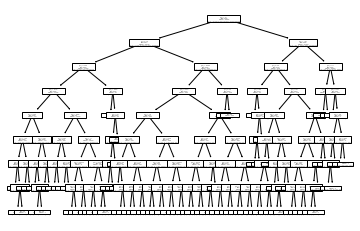

In [ ]:
#visualize the tree
tree.plot_tree(clf2)

In [ ]:
#//Predt Predt_cat Predt_subcat
#dfTEST['attack', 'category', 'subcategory']
a=dfTEST['attack']
b=dfTEST['category']
c=dfTEST['subcategory']
count=0
for i in range(0,len(dfTEST)):
  if(Predt[i]==a[i]) and (Predt_cat[i]==b[i]) and (Predt_subcat[i]==c[i]):
    count=count+1
count
count/len(dfTEST)*100

97.20050974165366